In [1]:
from src.data_pipeline import build_dataloaders

In [2]:
h5_path  = "data/WIG_v1.2.1_900.h5"
csv_path = "data/wig_v1.2.1_index.csv"

(loaders, datasets, meta) = build_dataloaders(
    h5_path=h5_path, csv_path=csv_path,
    ratios=(0.8, 0.1, 0.1),
    batch_size=16, num_workers=4,
    pin_memory=True, seed=42
)

train_loader, val_loader, test_loader = loaders
print(meta["n_train_imgs"], meta["n_val_imgs"], meta["n_test_imgs"])

5706 720 625


In [3]:
# --- 1) 形状とミニバッチの中身を確認 ---
x, y = next(iter(train_loader))
print("x:", tuple(x.shape), x.dtype, f"[{x.min().item():.3f}, {x.max().item():.3f}]")
for k in ("fam","gen","spe"):
    print(f"{k}:", tuple(y[k].shape), y[k].dtype, "min=", int(y[k].min()), "max=", int(y[k].max()))


x: (16, 1, 512, 512) torch.float32 [0.000, 1.000]
fam: (16,) torch.int64 min= 0 max= 5
gen: (16,) torch.int64 min= 0 max= 27
spe: (16,) torch.int64 min= 0 max= 109


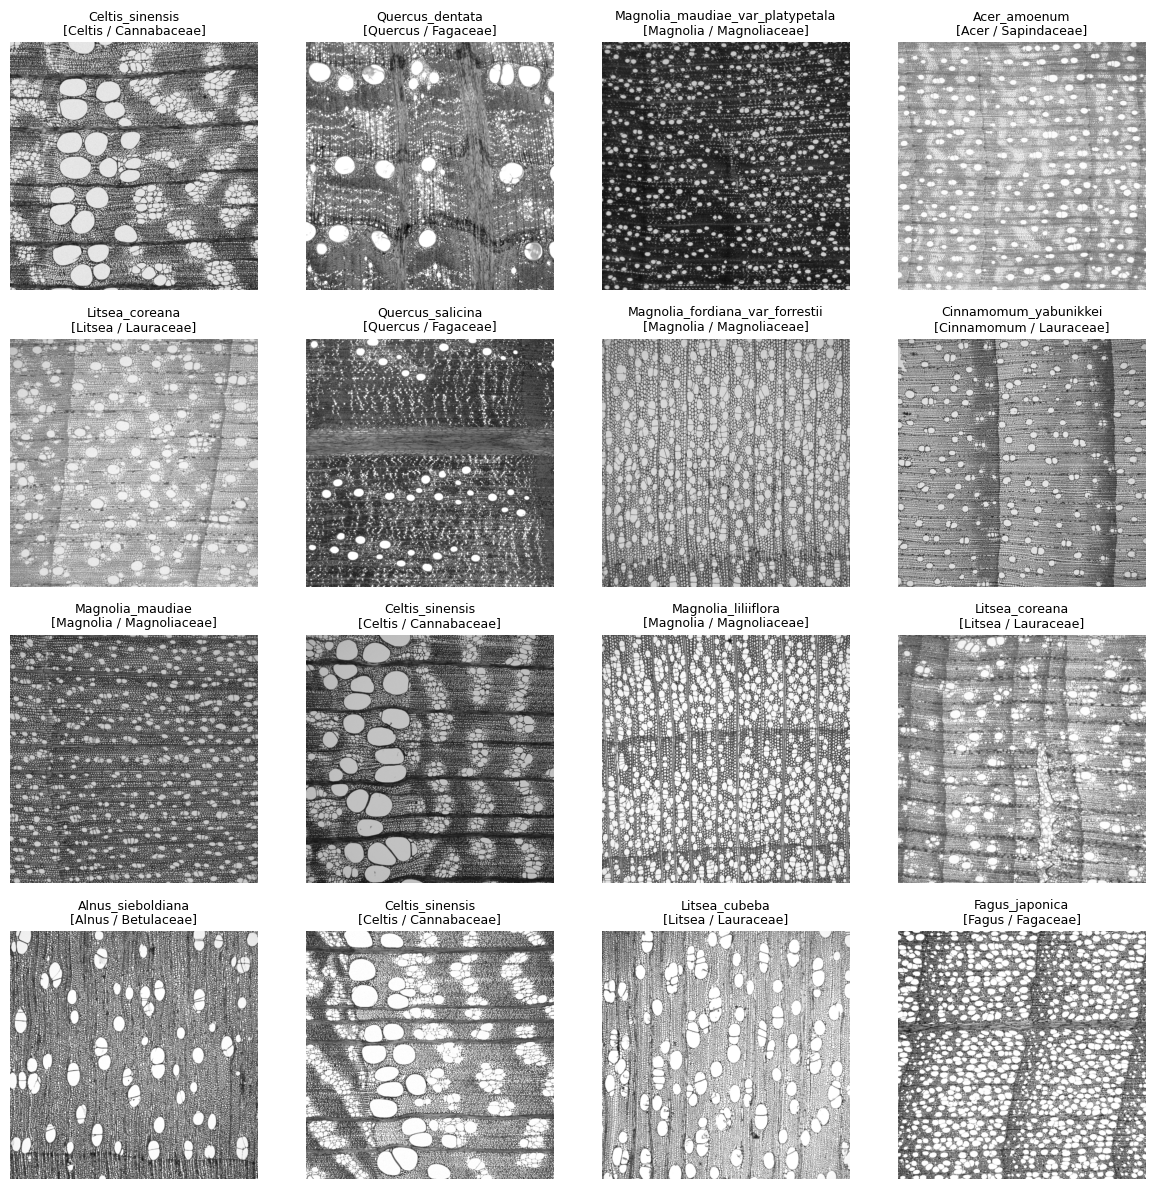

In [4]:
# --- 2) 可視化（最大16枚、タイトルに species/genus/family を表示） ---
import matplotlib.pyplot as plt
from math import ceil

# id -> ラベル名 に変換
id2fam = {v:k for k,v in meta["fam2id"].items()}
id2gen = {v:k for k,v in meta["gen2id"].items()}
id2spe = {v:k for k,v in meta["spe2id"].items()}

def show_batch(x, y, n=16):
    x = x.cpu()
    n = min(n, x.size(0))
    cols = 4
    rows = ceil(n / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(cols*3, rows*3))
    axes = axes.ravel()

    for i in range(n):
        img = x[i, 0].numpy()  # [H, W], 0-1
        fam = id2fam[int(y["fam"][i])]
        gen = id2gen[int(y["gen"][i])]
        spe = id2spe[int(y["spe"][i])]

        axes[i].imshow(img, cmap="gray", vmin=0, vmax=1)
        axes[i].set_title(f"{spe}\n[{gen} / {fam}]", fontsize=9)
        axes[i].axis("off")

    for j in range(n, rows*cols):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()

show_batch(x, y, n=16)